In [1]:
import networkx as nx
import warnings
import datetime
import seaborn as sn
sn.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from ast import literal_eval
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
linedf = pd.read_csv("Data/lines.csv", sep=";")

In [38]:
def occupancy(path):
    df = pd.read_csv(path)

    listofmeans = []
    for index, row in df.iterrows():
        listoflists = [literal_eval(row['occupancy1']), literal_eval(row['occupancy2']), 
            literal_eval(row['occupancy3']), literal_eval(row['occupancy4']), literal_eval(row['occupancy5']), 
            literal_eval(row['occupancy6']), literal_eval(row['occupancy7']), literal_eval(row['occupancy8']),
            literal_eval(row['occupancy9']), literal_eval(row['occupancy10'])]

        singelist = map(sum, map(lambda l: map(float, l), zip(*listoflists)))
        averagelist = [x / 10 for x in singelist]

        if row['line'].endswith('1'):
            averagelist = averagelist[::-1]

        listofmeans.append(averagelist)

    df['mean'] = listofmeans
    df['linename'] = df['line'].apply(lambda x: x[:-2])
    df = df.merge(linedf, left_on = "linename", right_on = "Line")
    df = df[['departure','line', 'mean', 'Route1']]
    df['Route1'] = df['Route1'].apply(lambda x: literal_eval(x))
    return df

In [291]:
example = occupancy("../../Results/Sc1Weekend/8/vehicles8.csv")
example[example['line'] == "tram12_0"]

,departure,line,mean,Route1
33,08:05:00,tram12_0,"[1.1, 1.5, 3.0, 2.7, 2.7, 3.0, 3.9, 8.4, 9.9, ...","[Centraal Station, Nieuwezijds Kolk, Dam, Spui..."
35,08:11:00,tram12_0,"[3.9, 4.2, 3.9, 3.8, 3.5, 3.5, 3.4, 4.9, 5.6, ...","[Centraal Station, Nieuwezijds Kolk, Dam, Spui..."
37,08:17:00,tram12_0,"[6.1, 6.3, 6.2, 5.9, 5.7, 5.6, 6.1, 6.5, 6.6, ...","[Centraal Station, Nieuwezijds Kolk, Dam, Spui..."
39,08:23:00,tram12_0,"[6.9, 7.2, 6.7, 5.9, 5.4, 5.6, 6.0, 6.9, 6.7, ...","[Centraal Station, Nieuwezijds Kolk, Dam, Spui..."
41,08:29:00,tram12_0,"[9.1, 8.9, 9.2, 8.2, 7.4, 7.4, 7.3, 8.8, 8.5, ...","[Centraal Station, Nieuwezijds Kolk, Dam, Spui..."
43,08:35:00,tram12_0,"[9.7, 8.2, 12.2, 10.8, 9.3, 9.2, 8.5, 9.6, 7.9...","[Centraal Station, Nieuwezijds Kolk, Dam, Spui..."
45,08:41:00,tram12_0,"[8.7, 8.2, 8.0, 7.0, 6.3, 6.1, 6.3, 7.0, 6.5, ...","[Centraal Station, Nieuwezijds Kolk, Dam, Spui..."
47,08:47:00,tram12_0,"[7.5, 6.8, 7.3, 6.8, 6.3, 6.2, 5.8, 6.8, 6.4]","[Centraal Station, Nieuwezijds Kolk, Dam, Spui..."
49,08:53:00,tram12_0,"[10.7, 10.9, 10.0, 9.3]","[Centraal Station, Nieuwezijds Kolk, Dam, Spui..."
51,08:59:00,tram12_0,[8.1],"[Centraal Station, Nieuwezijds Kolk, Dam, Spui..."


In [256]:
def plot_occupancy(line, time, hour):
    scenario1 = occupancy("../../Results/Sc1Week/" + hour + "/vehicles" + hour + ".csv")
    scenario2 = occupancy("../../Results/Sc2Week/" + hour + "/vehicles" + hour + ".csv")
    
    scenario1 = scenario1[(scenario1['line'] == line) & (scenario1['departure'] == time)]
    scenario2 = scenario2[(scenario2['line'] == line) & (scenario2['departure'] == time)]
    
    length = len(list(scenario1['mean'])[0])
    
    route = list(scenario1['Route1'])[0]
    df = pd.DataFrame({'Scenario 1': list(scenario1['mean'])[0], 
                       'Scenario 2': list(scenario2['mean'])[0]}, index=route[1:length + 1])
    
    plot = df.plot(style='.-', figsize = [20,8], colors = sn.color_palette("Set2", 2), fontsize='x-large')
    plot.set_xticklabels(index, rotation=90)
    plot.set(xticks=range(0, length + 1), xticklabels=route[1:length + 1])
    plot.legend(fontsize='x-large')
    return plot

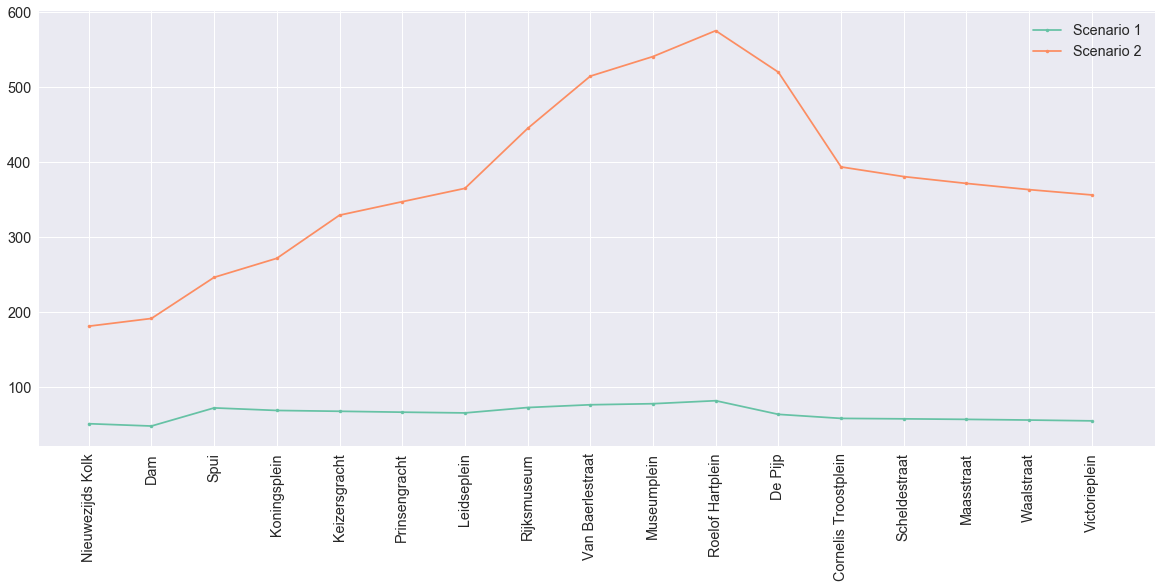

In [294]:
plot_occupancy('tram12_0', '17:35:00', '17')

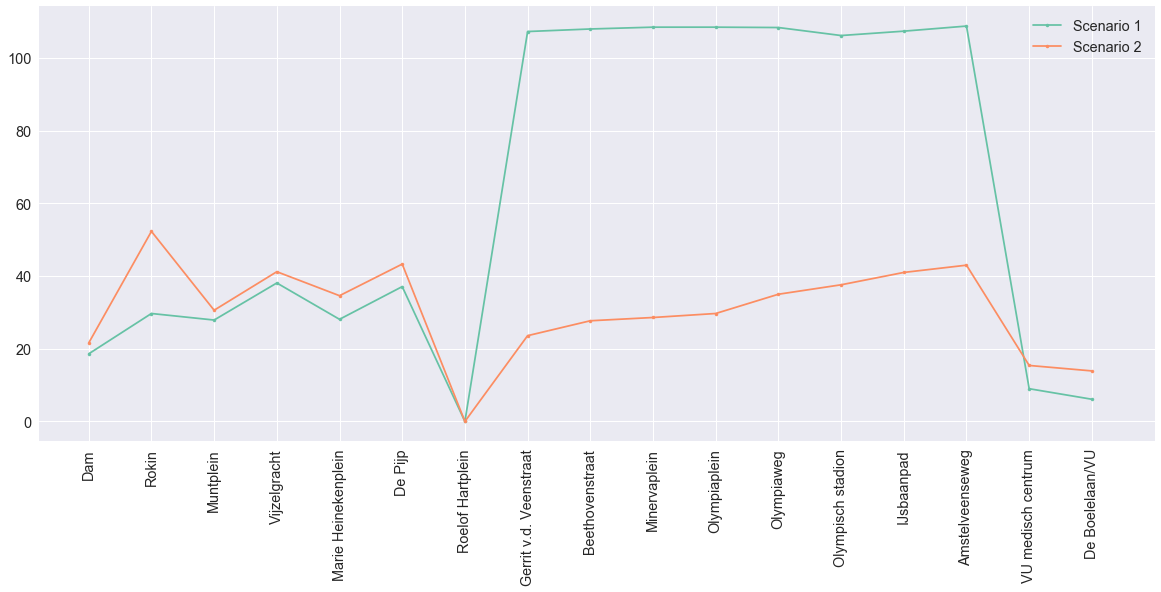

In [299]:
plot_occupancy('tram24_0', '17:15:00', '17')